In [2]:
!pip install -r requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**EDA OFERTAS RELÁMPAGO**

In [4]:
df = pd.read_csv('ofertas_relampago.csv')
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [5]:
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

In [6]:
# Verificar la información general del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag



*   La columna origin no será tenida en cuenta dada la baja representación que tiene en cantidad de data no nula en el dataset.


In [7]:
# Verificar las estadísticas descriptivas del DataFrame
print(df.describe())


       INVOLVED_STOCK  REMAINING_STOCK_AFTER_END   SOLD_AMOUNT  SOLD_QUANTITY
count    48746.000000               48746.000000  24579.000000   24579.000000
mean        35.007508                  30.565216     51.208898      10.851052
std        206.761058                 195.813806    175.254414      45.475305
min          1.000000                -192.000000      0.280000       1.000000
25%          5.000000                   4.000000      5.730000       1.000000
50%         10.000000                   8.000000     12.420000       3.000000
75%         15.000000                  15.000000     30.925000       6.000000
max       9000.000000                8635.000000   4836.570000    1646.000000


**ANÁLISIS DE DF DESCRIBE**

El análisis estadístico muestra información relevante sobre cuatro variables: INVOLVED_STOCK, REMAINING_STOCK_AFTER_END, SOLD_AMOUNT y SOLD_QUANTITY. De este se puede concluir que:

**INVOLVED_STOCK:** La cantidad promedio de productos involucrados en la muestra es de 35 unidades, pero la desviación estándar es bastante alta (206.76), lo que indica que hay una gran variación en la cantidad de productos involucrados en cada transacción.

***REMAINING_STOCK_AFTER_END:*** La cantidad promedio de productos restantes después de la venta es de 30.56 unidades, con una desviación estándar alta (195.81), lo que indica que también hay mucha variación en la cantidad de productos que quedan después de cada transacción.

***SOLD_AMOUNT:*** La cantidad promedio vendida por transacción es de 51.21 unidades, pero la desviación estándar es muy alta (175.25), lo que sugiere que hay una gran variación en los montos de las transacciones.

***SOLD_QUANTITY:*** La cantidad promedio de productos vendidos por transacción es de 10.85 unidades, con una desviación estándar alta (45.48), lo que indica que hay una variación importante en la cantidad de productos vendidos en cada transacción.

El valor mínimo para la variable REMAINING_STOCK_AFTER_END es -192, lo que sugiere que hay transacciones en las que se venden más productos de los que estaban disponibles en el inventario. Esto es un punto de atención que debe ser investigado.

En general, los datos muestran una alta variabilidad en las cuatro variables analizadas, lo que indica que puede haber muchas diferencias en el comportamiento de las transacciones.

In [8]:
# Verificar la cantidad de valores únicos por columna
print(df.nunique())

OFFER_START_DATE               61
OFFER_START_DTTM              783
OFFER_FINISH_DTTM            7578
OFFER_TYPE                      1
INVOLVED_STOCK                505
REMAINING_STOCK_AFTER_END     801
SOLD_AMOUNT                  7603
SOLD_QUANTITY                 373
ORIGIN                          1
SHIPPING_PAYMENT_TYPE           2
DOM_DOMAIN_AGG1                36
VERTICAL                        9
DOMAIN_ID                    1266
dtype: int64


In [9]:
# Verificar los valores faltantes en el DataFrame
print(df.isna().sum())

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


SOLD_AMOUNT y SOLD_QUANTITY: Hay 24167 valores nulos en ambas columnas, lo que significa que no se tienen datos sobre la cantidad de productos vendidos y su valor durante las ofertas.

Por lo tanto, no se pueden sacar conclusiones acerca de los productos vendidos durante las ofertas, ni se puede obtener información sobre la fuente de origen de los productos. Por lo tanto, es importante tener en cuenta estos valores nulos antes de realizar cualquier análisis adicional y tratar de obtener más información sobre los mismos.

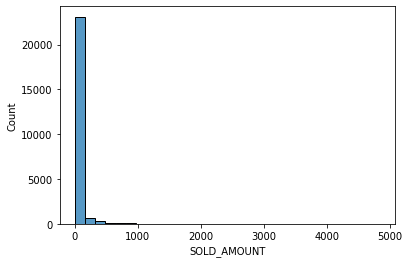

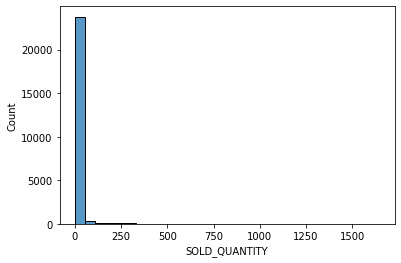

In [10]:
# Verificar la distribución de las variables numéricas
sns.histplot(data=df, x='SOLD_AMOUNT', bins=30)
plt.show()

sns.histplot(data=df, x='SOLD_QUANTITY', bins=30)
plt.show()

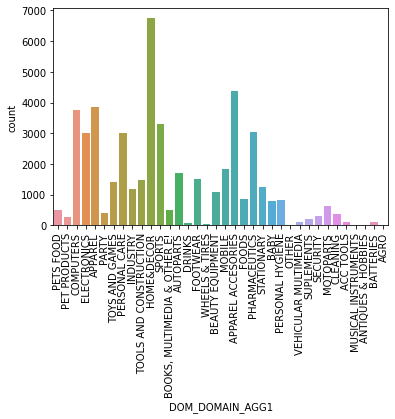

In [11]:
# Verificar la distribución de las variables categóricas
sns.countplot(data=df, x='DOM_DOMAIN_AGG1')
plt.xticks(rotation=90)
plt.show()

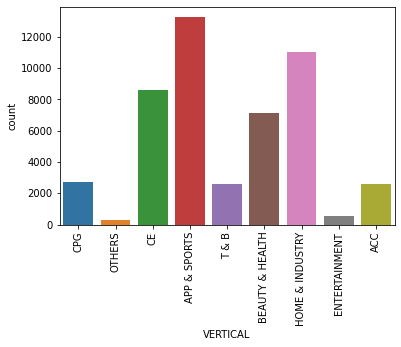

In [12]:
sns.countplot(data=df, x='VERTICAL')
plt.xticks(rotation=90)
plt.show()

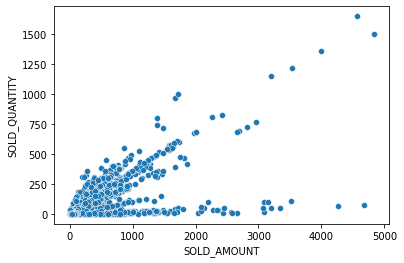

In [13]:
# Verificar las relaciones entre variables numéricas
sns.scatterplot(data=df, x='SOLD_AMOUNT', y='SOLD_QUANTITY')
plt.show()

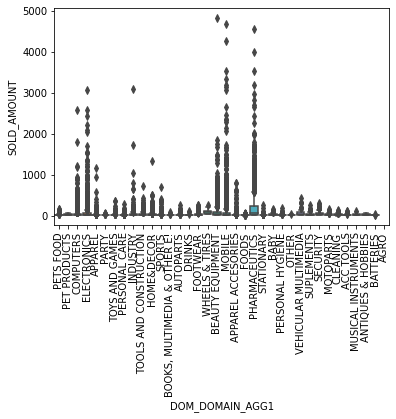

In [14]:
# Verificar las relaciones entre variables categóricas y numéricas
sns.boxplot(data=df, x='DOM_DOMAIN_AGG1', y='SOLD_AMOUNT')
plt.xticks(rotation=90)
plt.show()

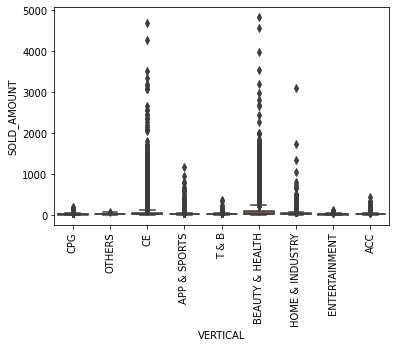

In [15]:
sns.boxplot(data=df, x='VERTICAL', y='SOLD_AMOUNT')
plt.xticks(rotation=90)
plt.show()

In [16]:
def calculate_sold_percentage(df):
    # Agrupar por vertical y sumar las columnas de unidades vendidas y unidades en inventario
    vertical_sales = df.groupby('VERTICAL')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_QUANTITY']].sum()
    
    # Calcular el porcentaje de unidades vendidas
    vertical_sales['SOLD_PERCENTAGE'] = (vertical_sales['SOLD_QUANTITY'] / (vertical_sales['INVOLVED_STOCK'])) * 100
    
    # Ordenar por porcentaje de unidades vendidas de forma descendente
    vertical_sales = vertical_sales.sort_values(by='SOLD_PERCENTAGE', ascending=False)
    
    return vertical_sales


Análisis de rotación de inventario por vertical

                 INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_QUANTITY  \
VERTICAL                                                                    
ACC                       24611                      19442         5156.0   
BEAUTY & HEALTH          910449                     786004       178141.0   
CPG                       39959                      33973         5696.0   
OTHERS                     2900                       2547          357.0   
HOME & INDUSTRY          230207                     202951        27161.0   
ENTERTAINMENT              3167                       2801          357.0   
APP & SPORTS             239958                     215455        25658.0   
CE                       211417                     185589        21833.0   
T & B                     43808                      41170         2349.0   

                 SOLD_PERCENTAGE  
VERTICAL                          
ACC                    20.949982  
BEAUTY & HEALTH        19.566280  
CPG         

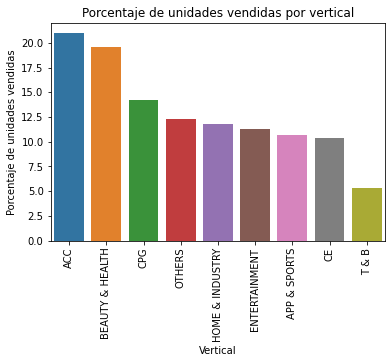

In [17]:

# Calcular los porcentajes de unidades vendidas
sold_percentages = calculate_sold_percentage(df)
print(sold_percentages)
# Graficar los resultados
sns.barplot(x=sold_percentages.index, y='SOLD_PERCENTAGE', data=sold_percentages)
plt.xticks(rotation=90)
plt.xlabel('Vertical')
plt.ylabel('Porcentaje de unidades vendidas')
plt.title('Porcentaje de unidades vendidas por vertical')
plt.show()

**Insights ventas por vertical**


La vertical con la mayor cantidad de stock involucrado fue Beauty & Health con 910,449 unidades.
La vertical con el mayor porcentaje de unidades vendidas en relación con el stock involucrado fue ACC con un 20.95%, seguida de cerca por Beauty & Health con un 19.57%. Por el contrario, la vertical con el menor porcentaje fue T & B con solo un 5.36%, a pesar de tener una cantidad menor de stock involucrado en comparación con otras verticales.

In [18]:
def calculate_stock_percentage(df):
    # Agrupar por vertical y sumar las columnas de unidades vendidas y unidades en inventario
    vertical_sales = df.groupby('VERTICAL')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_QUANTITY']].sum()
    
    # Calcular el porcentaje de unidades vendidas
    vertical_sales['REMAINING_STOCK_PERCENTAGE'] = (vertical_sales['REMAINING_STOCK_AFTER_END'] / (vertical_sales['INVOLVED_STOCK'])) * 100
    
    # Ordenar por porcentaje de unidades vendidas de forma descendente
    vertical_sales = vertical_sales.sort_values(by='REMAINING_STOCK_PERCENTAGE', ascending=False)
    
    return vertical_sales

                 INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  SOLD_QUANTITY  \
VERTICAL                                                                    
T & B                     43808                      41170         2349.0   
APP & SPORTS             239958                     215455        25658.0   
ENTERTAINMENT              3167                       2801          357.0   
HOME & INDUSTRY          230207                     202951        27161.0   
OTHERS                     2900                       2547          357.0   
CE                       211417                     185589        21833.0   
BEAUTY & HEALTH          910449                     786004       178141.0   
CPG                       39959                      33973         5696.0   
ACC                       24611                      19442         5156.0   

                 REMAINING_STOCK_PERCENTAGE  
VERTICAL                                     
T & B                             93.978269  
APP & SPORTS  

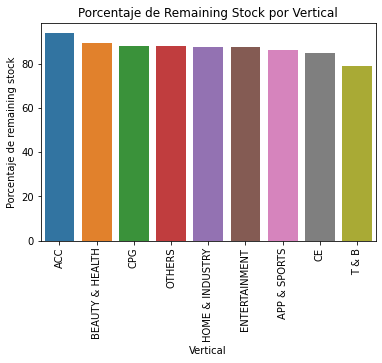

In [19]:

# Calcular los porcentajes de STOCK QUE QUEDAN POR VERTICAL
stock_percentages = calculate_stock_percentage(df)
print(stock_percentages)
# Graficar los resultados
sns.barplot(x=sold_percentages.index, y='REMAINING_STOCK_PERCENTAGE', data=stock_percentages)
plt.xticks(rotation=90)
plt.xlabel('Vertical')
plt.ylabel('Porcentaje de remaining stock')
plt.title('Porcentaje de Remaining Stock por Vertical')
plt.show()

**Insights de Stock por vertical**

Se puede concluir que la vertical T & B tuvo el mayor porcentaje de inventario restante después de la venta, con un 93.98%, seguida de la vertical de APP & SPORTS con un 89.79%, mientras que la vertical de ACC tuvo el menor porcentaje de inventario restante con un 78.99%. Además, se puede ver que la vertical de BEAUTY & HEALTH tuvo la mayor cantidad de ventas con 178,141 unidades vendidas y un porcentaje de inventario restante del 86.33%.

                              INVOLVED_STOCK  REMAINING_STOCK_AFTER_END  \
DOM_DOMAIN_AGG1                                                           
PETS FOOD                               4039                       2474   
ANTIQUES & HOBBIES                        35                         25   
VEHICULAR MULTIMEDIA                    1162                        860   
AUTOPARTS                              16706                      12828   
BATTERIES                                799                        618   
CLEANING                                5315                       4118   
PHARMACEUTICS                         701047                     606054   
INDUSTRY                               15036                      12222   
SUPLEMENTS                              2199                       1786   
DRINKS                                   647                        527   
ACC TOOLS                                945                        781   
PERSONAL CARE            

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


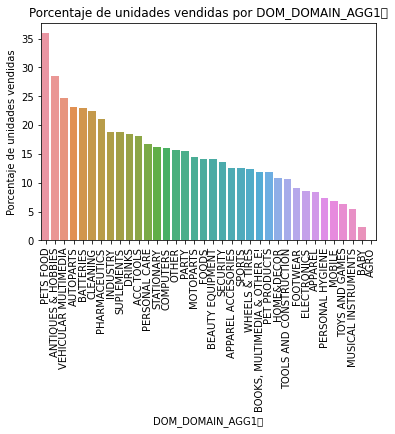

In [20]:
# DOM_DOMAIN_AGG1	
def calculate_domain_percentage(df):
    # Agrupar por vertical y sumar las columnas de unidades vendidas y unidades en inventario
    vertical_sales = df.groupby('DOM_DOMAIN_AGG1')[['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END', 'SOLD_QUANTITY']].sum()
    
    # Calcular el porcentaje de unidades vendidas
    vertical_sales['DOMAIN_PERCENTAGE'] = (vertical_sales['SOLD_QUANTITY'] / (vertical_sales['INVOLVED_STOCK'])) * 100
    
    # Ordenar por porcentaje de unidades vendidas de forma descendente
    vertical_sales = vertical_sales.sort_values(by='DOMAIN_PERCENTAGE', ascending=False)
    
    return vertical_sales
# Calcular los porcentajes de unidades vendidas
sold_percentages = calculate_domain_percentage(df)
print(sold_percentages)
# Graficar los resultados
sns.barplot(x=sold_percentages.index, y='DOMAIN_PERCENTAGE', data=sold_percentages)
plt.xticks(rotation=90)
plt.xlabel('DOM_DOMAIN_AGG1	')
plt.ylabel('Porcentaje de unidades vendidas')
plt.title('Porcentaje de unidades vendidas por DOM_DOMAIN_AGG1	')
plt.show()

**Insights a partir del análisis de inventarios por DOM_DOMAIN_AGG1**

- El dominio de mayor porcentaje de unidades vendidas es PETS FOOD con un 35,92%.
- El dominio con menor porcentaje de unidades vendidas es AGRO con 0,00%.
- Los dominios con mayor cantidad de unidades vendidas son PHARMACEUTICS y BEAUTY EQUIPMENT con 147697 y 24300 unidades respectivamente.
- Los dominios con menor cantidad de unidades vendidas son AGRO y MUSICAL INSTRUMENTS con 0 y 17 unidades respectivamente.
- El dominio con mayor cantidad de unidades en inventario después del final es PHARMACEUTICS con 606054 unidades.
- El dominio con menor cantidad de unidades en inventario después del final es AGRO con 10 unidades.
- Los dominios con mayor porcentaje de unidades en inventario después del final son PETS FOOD y HOME&DECOR con un 35,92% y un 10,91% respectivamente.
- Los dominios con menor porcentaje de unidades en inventario después del final son AGRO y BABY con 0,00% y 2,26% respectivamente.
- El dominio con mayor cantidad de inventario involucrado es PHARMACEUTICS con 701047 unidades.
- El dominio con menor cantidad de inventario involucrado es AGRO con 10 unidades.

## INSIGHTS GENERALES

- Las ofertas relámpago aumentan la proporción de ventas para las verticales ACC y Beauty & Health.
- Las ofertas relámpago no aumentan la proporción de ventas para las verticales T&B y APP & SPORTS. Tampoco ayudan a liberar ni rotar inventario en estas verticales, por lo que no son buenas candidatas para este tipo de ofertas.
- Para el dominio BABY son significativas las ofertas relámpago pues ayudan a agotar y rotar inventario.
- Para el dominio PHARMACEUTICS las ofertas relámpago ayudan a agotar inventario (probablemente con necesidad de salir por fecha de vencimiento). Sin embargo, dada la cantidad de stock disponible no se logra agotar el inventario pues tiene gran cantidad de unidades en stock residual.
- En general, existe una desviación estándar alta entre el número de ventas por vertical.